<h1>Построение модели предсказания читаемости текстов на основе
лингвистических характеристик</h1>

<h2>Данные были взяты с https://github.com/scrosseye/CLEAR-Corpus</h2>

<h2>Данные представляют из себя следующее </h2>

- Label – Описание.
- ID – уникальный идентификатор для отрывка.
- Author – автор отрывка.
- Title – Название источника или книги с которой был взят отрывок.
- Anthology – Антология с которой был взят отрывок (если она была).
- URL – URL ссылка на отрывок.
- Pub Year – Год публикации.
- Categ – Категория к которой принадлежит отрывок.
- Sub Cat – Под категория к которой принадлежит отрывок.
- Lexile Band – Значение метрики Lexile.
- Location – Локация с которой происходит отрывок.
- License – Лицензия отрывка.
- MPAA Max – Рейтинг Американской ассоциации кинокомпаний (от G до R).
- MPAA #Max – Максимальный отданный рейтинг MPAA.
- MPAA #Avg – Среднее значение рейтинга MPAA между двумя оценщиками.
- Excerpt – Отрывок.
- Google WC – Количество слов подсчитанное Google.
- Sentence Count – Количество предложений в отрывке.
- Paragraphs – Количество параграфов в отрывке.
- BT_easiness - Bradley Terry балл читаемости.
- s.e. – Стандартная ошибка для балла BT_easiness.
- Flesch-Reading-Ease - Flesch-Reading-Ease балл.
- Flesch-Kincaid-Grade-Level - Flesch-Kincaid-Grade-Level балл.
- Automated Readability Index - Automated Readability Index балл.
- SMOG Readability - SMOG Readability балл.
- New Dale-Chall Readability Formula - New Dale-Chall Readability Formula балл.
- CAREC - Краудсорсинговый алгоритм оценки понимания прочитанного (CAREC).
- CAREC_M - Краудсорсинговый алгоритм оценки понимания прочитанного (CAREC_M), контролируемый по длине текста.
- CML2RI - Индекс читаемости второго уровня Coh-Metric (CML2RI).


In [ ]:
import pandas as pd

In [ ]:
!pip install openpyxl

In [ ]:
df = pd.read_excel("CLEAR_corpus_final.xlsx",  sheet_name="Data")
df.head(10)

,ID,Author,Title,Anthology,URL,Pub Year,Categ,Sub Cat,Lexile Band,Location,...,BT_easiness,s.e.,Flesch-Reading-Ease,Flesch-Kincaid-Grade-Level,Automated Readability Index,SMOG Readability,New Dale-Chall Readability Formula,CAREC,CAREC_M,CML2RI
0,400,Carolyn Wells,Patty's Suitors,NaN,http://www.gutenberg.org/cache/epub/5631/pg563...,1914.0,Lit,NaN,900,mid,...,-0.340259,0.464009,81.70,5.95,7.37,8.0,6.55,0.12102,0.11952,12.097815
1,401,Carolyn Wells,Two Little Women on a Holiday,NaN,http://www.gutenberg.org/cache/epub/5893/pg589...,1917.0,Lit,NaN,700,mid,...,-0.315372,0.480805,80.26,4.86,4.16,7.0,6.25,0.04921,0.04921,22.550179
2,402,Carolyn Wells,Patty Blossom,NaN,http://www.gutenberg.org/cache/epub/20945/pg20...,1917.0,Lit,NaN,900,mid,...,-0.580118,0.476676,79.04,6.03,5.81,9.0,7.31,0.10172,0.09724,18.125279
3,403,CHARLES KINGSLEY,THE WATER-BABIES\nA Fairy Tale for a Land-Baby,NaN,http://www.gutenberg.org/files/25564/25564-h/2...,1863.0,Lit,NaN,1300,mid,...,-1.785965,0.526599,44.77,20.51,24.87,12.0,8.56,0.07491,0.08856,10.959460
4,404,Charles Kingsley,HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...,The Heroes\n or Greek Fairy Tales for my...,http://www.gutenberg.org/files/677/677-h/677-h...,1889.0,Lit,NaN,1300,mid,...,-1.054013,0.450007,68.07,12.06,15.47,8.0,7.00,0.06356,0.08798,3.195960
5,405,Charles Madison Curry\n Erle Elsworth C...,The Three Little Bears,Children's Literature\n A Textbook of So...,http://www.gutenberg.org/files/25545/25545-h/2...,1920.0,Lit,NaN,300,mid,...,0.247197,0.510845,80.94,9.47,10.76,5.0,1.71,0.35370,0.36885,28.990105
6,406,Clair W. Hayes,"The Boy Allies On the Firing Line\n Or, ...",NaN,http://www.gutenberg.org/files/12870/12870-h/1...,1915.0,Lit,NaN,1300,mid,...,-0.861809,0.480936,59.67,10.72,11.45,11.0,8.09,0.15617,0.16523,12.766583
7,407,Clair W. Hayes,The Boy Allies in Great Peril,NaN,http://www.gutenberg.org/cache/epub/12682/pg12...,1916.0,Lit,NaN,1300,mid,...,-1.759061,0.476507,60.87,10.20,11.88,12.0,9.23,0.19484,0.18656,14.130141
8,408,Clair W. Hayes,The Boy Allies At Verdun,NaN,http://www.gutenberg.org/cache/epub/13020/pg13...,1917.0,Lit,NaN,1300,start,...,-0.952325,0.498116,68.79,9.80,11.03,11.0,7.51,0.11652,0.12905,10.216473
9,409,Claude A. Labelle,The Ranger Boys and the Border Smugglers,NaN,http://www.gutenberg.org/files/25514/25514-h/2...,1922.0,Lit,NaN,900,mid,...,-0.371641,0.463710,79.22,6.26,7.33,9.0,6.96,0.07015,0.07326,16.497078


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  4724 non-null   int64  
 1   Author                              4724 non-null   object 
 2   Title                               4724 non-null   object 
 3   Anthology                           2712 non-null   object 
 4   URL                                 4716 non-null   object 
 5   Pub Year                            4715 non-null   float64
 6   Categ                               4724 non-null   object 
 7   Sub Cat                             585 non-null    object 
 8   Lexile Band                         4724 non-null   object 
 9   Location                            4724 non-null   object 
 10  License                             1405 non-null   object 
 11  MPAA Max                            4724 no

<h2>ID, URL_LEGAL, LICENCE, STANDART_ERROR не будут использоваться при постоении моделей, поэтому они будут удалены</h2>

In [ ]:
df.columns

Index(['ID', 'Author', 'Title', 'Anthology', 'URL', 'Pub Year', 'Categ',
       'Sub Cat', 'Lexile Band', 'Location', 'License', 'MPAA Max',
       'MPAA #Max', 'MPAA# Avg', 'Excerpt', 'Google WC', 'Sentence Count',
       'Paragraphs', 'BT_easiness', 's.e.', 'Flesch-Reading-Ease',
       'Flesch-Kincaid-Grade-Level', 'Automated Readability Index',
       'SMOG Readability', 'New Dale-Chall Readability Formula', 'CAREC',
       'CAREC_M', 'CML2RI'],
      dtype='object')

In [ ]:
df.drop(['ID', 'Author', 'Title', 'Anthology', 'URL', 'Pub Year', 'Categ',
       'Sub Cat', 'Location', 'License', 'MPAA Max',
       'MPAA #Max', 'MPAA# Avg', 'Google WC', 'Sentence Count',
       'Paragraphs', 'BT_easiness', 's.e.', 'Flesch-Reading-Ease',
       'Flesch-Kincaid-Grade-Level', 'Automated Readability Index',
       'SMOG Readability', 'New Dale-Chall Readability Formula', 'CAREC',
       'CAREC_M', 'CML2RI'], axis=1, inplace=True)


<h2>Конвертируем excerpt в str</h2>

In [ ]:
df['excerpt'] = df['Excerpt'].astype(str)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Lexile Band  4724 non-null   object
 1   Excerpt      4724 non-null   object
 2   excerpt      4724 non-null   object
dtypes: object(3)
memory usage: 110.8+ KB


In [ ]:
import re

def extract_lexile_number(lexile_band):
    if isinstance(lexile_band, (int, float)):
        return float(lexile_band)
    match = re.search(r'\d+', str(lexile_band))
    if match:
        return float(match.group(0))
    return None # Handle cases where no number is found

df['target'] = df['Lexile Band'].apply(extract_lexile_number)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lexile Band  4724 non-null   object 
 1   Excerpt      4724 non-null   object 
 2   excerpt      4724 non-null   object 
 3   target       4724 non-null   float64
dtypes: float64(1), object(3)
memory usage: 147.8+ KB


<h2>Для каждого текста будут найдены следующие параметры:</h2>

* Average sentence length

* Average word length

* Word/sentence count

* Unique words ratio (vocabulary richness)

* Syllables per word

* POS tag ratios (nouns, verbs, adjectives)

* Frequency of complex conjunctions / punctuation

* Flesch score, Dale–Chall

In [ ]:
!pip install textstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.1 MB/s eta 0:00:00


In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import nltk
import re
from nltk.corpus import cmudict
import textstat
from nltk import pos_tag

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('cmudict')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

<h3>Напишем функцию для нахождения средней длины предложения в тексте</h3>

In [ ]:
def avarage_sen_len(text):
    sentences = sent_tokenize(text)
    total_words = 0
    total_sentences = len(sentences)

    for sentence in sentences:
        words = word_tokenize(sentence)
        total_words += len(words)

    return total_words / total_sentences


<h3>Напишем функцию для нахождения средней длины слов в тексте</h3>

In [ ]:
def avarage_word_len(text):
  words = word_tokenize(text)
  total_length = 0
  total_words = len(words)

  for word in words:
    total_length += len(word)

  return total_length / total_words

<h3>Напишем функцию для нахождения Word/sentence count</h3>

In [ ]:
def word_sentence_diff(text):
  total_words = len(word_tokenize(text))
  total_sentences = len(sent_tokenize(text))

  return total_words / total_sentences

<h3>Напишем функцию для нахождения богатства текста</h3>

In [ ]:
def vocabulary_richness(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha()]

    if len(words) == 0:
        return 0

    total_words = len(words)
    unique_words = len(set(words))

    return unique_words / total_words

<h3>Напишем функцию для подсчета количества слогов относительно слов в тесте</h3>

In [ ]:
def count_syllables(word):
    word = word.lower().strip()
    if len(word) <= 3:
        return 1

    vowels = 'aeiouy'
    count = 0

    if word.endswith('e'):
        word = word[:-1]

    if word.endswith('le') and len(word) > 2:
        count += 1

    prev_char_vowel = False
    for char in word:
        if char in vowels:
            if not prev_char_vowel:
                count += 1
            prev_char_vowel = True
        else:
            prev_char_vowel = False

    return max(1, count)

In [ ]:
cmu_dict = cmudict.dict()

def count_syllables_cmu(word):
    word = word.lower()
    if word in cmu_dict:
        pronunciation = cmu_dict[word][0]
        return len([ph for ph in pronunciation if ph[-1].isdigit()])
    else:
        return count_syllables(word)

def syllables_per_word_cmu(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())

    if len(words) == 0:
        return 0

    total_syllables = sum(count_syllables_cmu(word) for word in words)
    return total_syllables / len(words)

<h3>Напишем функцию для подсчета среднего значения POS(существительных, прилагательных, глаголов) среди слов</h3>

In [ ]:
def get_pos_ratios(text):
    words = [word for word in word_tokenize(text) if word.isalpha()]

    if not words:
        return 0.0, 0.0, 0.0

    tags = [tag for _, tag in pos_tag(words)]

    nouns = len([tag for tag in tags if tag.startswith('NN')])
    verbs = len([tag for tag in tags if tag.startswith('VB')])
    adjs = len([tag for tag in tags if tag.startswith('JJ')])

    total = len(words)
    return nouns/total, verbs/total, adjs/total

<h3>Напишем функцию для поиска количества сложных союзов и знаков пунктуации в тексте</h3>

In [ ]:
def complex_conjunctions_freq(text):
    conjunctions = {'although', 'however', 'nevertheless', 'moreover',
                   'furthermore', 'therefore', 'consequently', 'thus',
                   'hence', 'meanwhile', 'otherwise', 'despite', 'unless'}

    words = word_tokenize(text.lower())
    words = [w for w in words if w.isalpha()]

    if not words:
        return 0

    conj_count = sum(1 for word in words if word in conjunctions)
    return conj_count / len(words)

def punctuation_density(text):
    punct_marks = len(re.findall(r'[.,;:!?\-—()"\'/]', text))
    return punct_marks / len(text) if text else 0

<h3>flesch_reading_ease</h3>


In [ ]:
def flesch_reading_ease(text):
  return 206.835 - 1.015 * avarage_sen_len(text) - 84.6 * syllables_per_word_cmu(text)

<h3>dale_chall_readability_score</h3>

In [ ]:
def dale_chall_readability_score(text):

  with open("dale.txt", "r") as f:
    DALE = f.readlines()

  difficult_words = 0
  words = word_tokenize(text.lower())

  for word in words:
    if word in DALE:
      difficult_words += 1

  diff_to_normal_words = (difficult_words / len(words))  * 100

  dale_score = 0.1579 * diff_to_normal_words + 0.0496 * word_sentence_diff(text)

  if diff_to_normal_words > 5:
    dale_score += 3.6365

  return dale_score

<h3>smog_index</h3>

In [ ]:
def smog_index(text):
  sentences = sent_tokenize(text)

  if len(sentences) == 0:
    return 0

  polysyllabic_count = 0

  for sentence in sentences:
    words = word_tokenize(sentence)
    for word in words:
        clean_word = re.sub(r'[^a-zA-Z]', '', word).lower()
        if len(clean_word) > 0:
          syllable_count = count_syllables_cmu(clean_word)
          if syllable_count >= 3:
            polysyllabic_count += 1

  sentences_count = min(len(sentences), 30)
  if polysyllabic_count == 0:
    return 0

  smog_score = 1.043 * (polysyllabic_count * (30 / sentences_count)) ** 0.5 + 3.1291
  return round(smog_score, 2)

<h3>automated_readability_index</h3>

In [ ]:
def automated_readability_index(text):
  words = word_tokenize(text.lower())
  sentences = sent_tokenize(text)

  if len(words) == 0 or len(sentences) == 0:
    return 0

  total_characters = 0
  for word in words:
    total_characters += len(re.findall(r'[a-zA-Z]', word))

  characters_per_word = total_characters / len(words)
  words_per_sentence = len(words) / len(sentences)

  ari_score = (4.71 * characters_per_word) + (0.5 * words_per_sentence) - 21.43
  return round(ari_score, 2)

<h3>coleman_liau_index</h3>

In [ ]:
def coleman_liau_index(text):
  words = word_tokenize(text.lower())
  sentences = sent_tokenize(text)

  if len(words) == 0:
    return 0

  total_characters = 0
  for word in words:
    total_characters += len(re.findall(r'[a-zA-Z]', word))

  characters_per_100_words = (total_characters / len(words)) * 100
  sentences_per_100_words = (len(sentences) / len(words)) * 100

  coleman_liau_score = (0.0588 * characters_per_100_words) - (0.296 * sentences_per_100_words) - 15.8
  return round(coleman_liau_score, 2)

<h3>gunning_fog_index</h3>

In [ ]:
def gunning_fog_index(text):
  words = word_tokenize(text.lower())
  sentences = sent_tokenize(text)

  if len(words) == 0 or len(sentences) == 0:
    return 0

  complex_word_count = 0
  words = [word for word in words if word.isalpha()]

  for word in words:
    syllable_count = count_syllables_cmu(word)
    if syllable_count >= 3:
      complex_word_count += 1

  words_per_sentence = len(words) / len(sentences)
  complex_word_percentage = (complex_word_count / len(words)) * 100 if len(words) > 0 else 0

  fog_index = 0.4 * (words_per_sentence + complex_word_percentage)
  return round(fog_index, 2)

<h3>Добавим новые параметры в ДатаСет</h3>

In [ ]:
# Average sentence length
df['avg_sen_length'] = df['excerpt'].apply(avarage_sen_len)

# Average word length
df['avg_word_length'] = df['excerpt'].apply(avarage_word_len)

# Word/sentence count
df['word_sentence_diff'] = df['excerpt'].apply(word_sentence_diff)

# Unique words ratio (vocabulary richness)
df['vocabulary_richness'] = df['excerpt'].apply(vocabulary_richness)

# Syllables per word
df['syllables_per_word'] = df['excerpt'].apply(syllables_per_word_cmu)

# POS tag ratios (nouns, verbs, adjectives)
df[['noun_ratio', 'verb_ratio', 'adj_ratio']] = df['excerpt'].apply(
    lambda x: pd.Series(get_pos_ratios(x))
)

# Frequency of complex conjunctions / punctuation
df['conj_freq'] = df['excerpt'].apply(complex_conjunctions_freq)
df['punct_density'] = df['excerpt'].apply(punctuation_density)

df['flesch_reading_ease_score'] = df['excerpt'].apply(flesch_reading_ease)
df['dale_chall_readability_score'] = df['excerpt'].apply(dale_chall_readability_score)
df['SMOG_index'] = df['excerpt'].apply(smog_index)
df['automated_readability_index'] = df['excerpt'].apply(automated_readability_index)
df['coleman-liau_index'] = df['excerpt'].apply(coleman_liau_index)
df['gunning_fog_index'] = df['excerpt'].apply(gunning_fog_index)



In [ ]:
df.head()

,Lexile Band,Excerpt,excerpt,target,avg_sen_length,avg_word_length,word_sentence_diff,vocabulary_richness,syllables_per_word,noun_ratio,verb_ratio,adj_ratio,conj_freq,punct_density,flesch_reading_ease_score,dale_chall_readability_score,SMOG_index,automated_readability_index,coleman-liau_index,gunning_fog_index
0,900,When the young people returned to the ballroom...,When the young people returned to the ballroom...,900.0,18.545455,3.990196,18.545455,0.576271,1.314917,0.265537,0.192090,0.062147,0.000000,0.027218,76.769375,0.919855,8.84,6.01,5.29,8.92
1,700,"All through dinner time, Mrs. Fayre was somewh...","All through dinner time, Mrs. Fayre was somewh...",700.0,14.866667,3.502242,14.866667,0.640719,1.360465,0.197605,0.221557,0.077844,0.005988,0.059765,76.649984,0.737387,7.79,1.06,1.01,6.85
2,900,"As Roger had predicted, the snow departed as q...","As Roger had predicted, the snow departed as q...",900.0,19.090909,3.585714,19.090909,0.674847,1.325581,0.245399,0.196319,0.042945,0.000000,0.051762,75.313541,0.946909,9.10,3.73,2.14,8.63
3,1300,Mr. Grimes was to come up next morning to Sir ...,Mr. Grimes was to come up next morning to Sir ...,1300.0,61.666667,3.729730,61.666667,0.623377,1.262195,0.227273,0.207792,0.058442,0.006494,0.036557,37.461626,3.058667,12.46,26.18,4.67,22.35
4,1300,And outside before the palace a great garden w...,And outside before the palace a great garden w...,1300.0,38.800000,3.845361,38.800000,0.658385,1.239521,0.304348,0.124224,0.105590,0.000000,0.036304,62.589527,1.924480,8.24,15.28,5.05,13.63


<h3>Выведем описательную статистику</h3>

In [ ]:
df.describe()

,target,avg_sen_length,avg_word_length,word_sentence_diff,vocabulary_richness,syllables_per_word,noun_ratio,verb_ratio,adj_ratio,conj_freq,punct_density,flesch_reading_ease_score,dale_chall_readability_score,SMOG_index,automated_readability_index,coleman-liau_index,gunning_fog_index
count,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000,4724.000000,4724.00000
mean,1049.305673,24.746678,4.021941,24.746592,0.602471,1.432788,0.255605,0.178603,0.077040,0.001656,0.029724,60.503234,1.227431,11.080663,9.113080,5.488544,12.50942
std,283.616777,10.313917,0.423811,10.313885,0.059880,0.180599,0.055951,0.033897,0.028619,0.003388,0.010812,19.434885,0.511569,3.480072,5.993918,2.898137,4.78211
min,100.000000,5.447368,2.764977,5.447368,0.203488,1.000000,0.107784,0.069930,0.000000,0.000000,0.009778,-42.082741,0.270189,0.000000,-5.880000,-4.980000,2.11000
25%,900.000000,18.272727,3.722328,18.272727,0.569149,1.298761,0.215789,0.155689,0.056497,0.000000,0.022405,48.079622,0.906327,8.580000,5.375000,3.607500,9.14000
50%,1100.000000,23.571429,4.002252,23.571429,0.608187,1.402116,0.251282,0.177778,0.074866,0.000000,0.027342,61.707667,1.169143,11.020000,8.965000,5.645000,12.30500
75%,1300.000000,29.428571,4.298880,29.428571,0.643312,1.544871,0.290323,0.202128,0.095238,0.000000,0.034393,74.961976,1.459657,13.327500,12.310000,7.400000,15.34000
max,1900.000000,109.500000,6.085714,109.500000,0.766082,2.522581,0.521429,0.342282,0.224638,0.032468,0.097356,110.966095,5.431200,29.620000,53.750000,18.200000,47.40000


<h3>Классифицируем наши targets и выведем график</h3>

In [ ]:
def label_complexity(target):
    if target > 0:
        return "very_easy"
    elif target > -0.5:
        return "easy"
    elif target > -1.5:
        return "medium"
    else:
        return "hard"


In [ ]:
def predict_level(lexile):
  if lexile < 500:
    return "very_easy"
  elif lexile < 800:
    return "easy"
  elif lexile < 1100:
    return "medium"
  else:
    return "hard"


df["complexity_level"] = df["target"].apply(predict_level)
df[["excerpt", "complexity_level"]].head()

,excerpt,complexity_level
0,When the young people returned to the ballroom...,medium
1,"All through dinner time, Mrs. Fayre was somewh...",easy
2,"As Roger had predicted, the snow departed as q...",medium
3,Mr. Grimes was to come up next morning to Sir ...,hard
4,And outside before the palace a great garden w...,hard


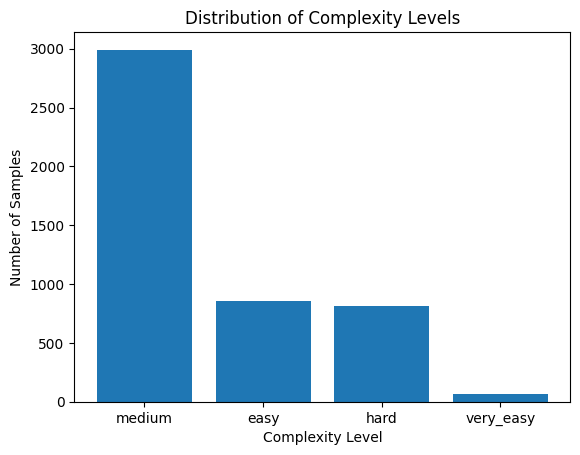

In [ ]:
import matplotlib.pyplot as plt


unique_levels = df["complexity_level"].unique()
count_for_levels = df["complexity_level"].value_counts().to_dict().values()

plt.bar(x=df["complexity_level"].unique(), height=count_for_levels)
plt.title("Distribution of Complexity Levels")
plt.xlabel("Complexity Level")
plt.ylabel("Number of Samples")
plt.show()

<h3>Сохраним полученный датасет</h3>

In [ ]:
df.to_csv("cleaned_and_prepared_data_2.csv")